In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler

In [2]:
# importing crop data of year 2020
# crop_data = pd.read_csv('./data/ndvi/crop_data_ndvi.csv')
crop_data = pd.read_csv('../data/ndvi/crop_data_ndvi_waterfiltered_march_bbox0005.csv')

In [3]:
X = crop_data.drop(columns=['Class of Land', 'Latitude and Longitude', 'ndvi_mean', 'ndvi_max'])
y = crop_data['Class of Land']

del crop_data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [5]:
X_train.head()

,vh,vv,RVI,ndvi_max,ndvi_min
284,0.036014,0.443425,0.082352,0.705629,0.167641
423,0.003684,0.009637,0.581758,-0.020097,-0.176689
525,0.001277,0.009442,0.164501,0.054231,-0.132071
519,0.003332,0.011909,0.408933,0.206687,-0.068686
12,0.002195,0.021262,0.114485,0.386711,0.129012


In [6]:
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [7]:
model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.51      1.00      0.68       245
        Rice       0.00      0.00      0.00       235

    accuracy                           0.51       480
   macro avg       0.26      0.50      0.34       480
weighted avg       0.26      0.51      0.34       480



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [8]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.46      1.00      0.63        55
        Rice       0.00      0.00      0.00        65

    accuracy                           0.46       120
   macro avg       0.23      0.50      0.31       120
weighted avg       0.21      0.46      0.29       120



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

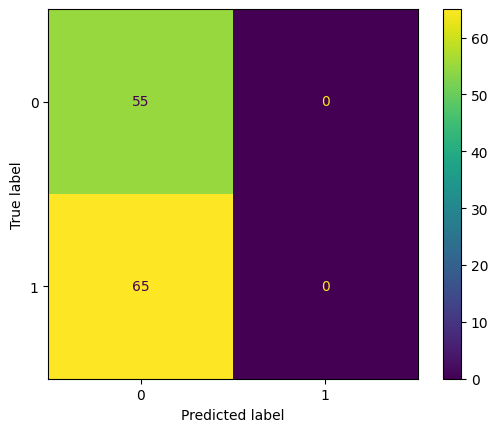

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [10]:
model = SVC()

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto', 'scale']
}

grid = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=50)
grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


(0.9391111111111111, {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'})

In [11]:
model = grid.best_estimator_

model.fit(X_train, y_train)

SVC(C=1000, gamma='auto')

In [12]:
y_pred = model.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.97      0.95      0.96       245
        Rice       0.95      0.97      0.96       235

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



In [13]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.96      0.93      0.94        55
        Rice       0.94      0.97      0.95        65

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



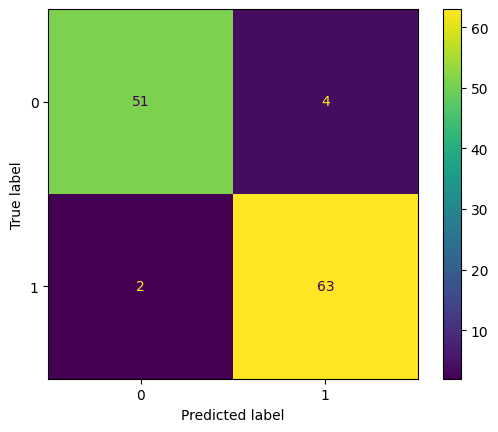

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## On validation data

In [15]:
# X_val = pd.read_csv('./data/ndvi/validation_data_ndvi.csv')
X_val = pd.read_csv('../data/ndvi/validation_data_ndvi_waterfiltered_march_bbox0005.csv')
coords = X_val['Latitude and Longitude']
X_val.drop(columns=['Latitude and Longitude', 'ndvi_mean', 'ndvi_max'], inplace=True)

In [16]:
X_val.head()

,vh,vv,RVI,ndvi_max,ndvi_min
0,0.007541,0.230875,0.022502,0.166159,0.053875
1,0.004003,0.083652,0.039041,0.265981,0.124449
2,0.027154,0.186894,0.180737,0.742831,0.433491
3,0.001572,0.009353,0.218368,0.546004,-0.091027
4,0.028073,0.150525,0.249271,0.138012,0.075622


In [17]:
# X_val = sc.transform(X_val)

In [18]:
y_pred = model.predict(X_val)

In [19]:
submission_df = pd.DataFrame({'id':coords.values, 'target':y_pred})

submission_df.head()

,id,target
0,"(10.18019073690894, 105.32022315786804)",Rice
1,"(10.561107033461816, 105.12772097986661)",Rice
2,"(10.623790611954897, 105.13771401411867)",Non Rice
3,"(10.583364246115156, 105.23946127195805)",Rice
4,"(10.20744446668854, 105.26844107128906)",Non Rice


In [20]:
submission_df.where(submission_df['target'] == 'Non Rice').count()

id        145
target    145
dtype: int64

In [21]:
submission_df.where(submission_df['target'] == 'Rice').count()

id        105
target    105
dtype: int64

In [22]:
y_test.where(y_test == 'Rice').count(), y_test.where(y_test == 'Non Rice').count()

(65, 55)

In [23]:
y_train.where(y_train == 'Rice').count(), y_train.where(y_train == 'Non Rice').count()

(235, 245)

In [24]:
submission_df.to_csv("../data/submissions/challenge_1_submission_rice_crop_prediction_ndvi_wf_march_bbox0005_min.csv", index=False)

In [25]:
X_train.shape, X_test.shape, X_val.shape

((480, 5), (120, 5), (250, 5))